# Principal Component Analysis using the Linear Autoencoders
## Self Made Blobs Dataset using sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [15]:
data = make_blobs(n_samples=444,n_features=3,centers=2, random_state=41)

In [16]:
type(data)

tuple

In [17]:
data

(array([[ -3.61539083, -10.22964638,   3.57767171],
        [ -4.22797678,  -8.38075995,   3.08711864],
        [ -9.5808975 ,  -7.51443156,   2.86716615],
        ...,
        [-10.08437747,  -7.83881512,   1.5793197 ],
        [ -9.79352414,  -8.08523278,   2.19074221],
        [ -9.56126351,  -8.7421577 ,   1.65550949]]),
 array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       

In [18]:
# take the Data Features seperate and do the scaling simultaneously
# features -> data[0]
# labels -> data[1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [20]:
print(scaled_data.shape)
scaled_data

(444, 3)


array([[0.83322021, 0.23856776, 0.62616615],
       [0.77141692, 0.50103757, 0.55189088],
       [0.23136517, 0.62402243, 0.51858759],
       ...,
       [0.18056949, 0.57797261, 0.32359311],
       [0.20991344, 0.54299091, 0.41616938],
       [0.23334603, 0.44973317, 0.33512911]])

In [21]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [22]:
# visualizing the data first
from mpl_toolkits.mplot3d import Axes3D

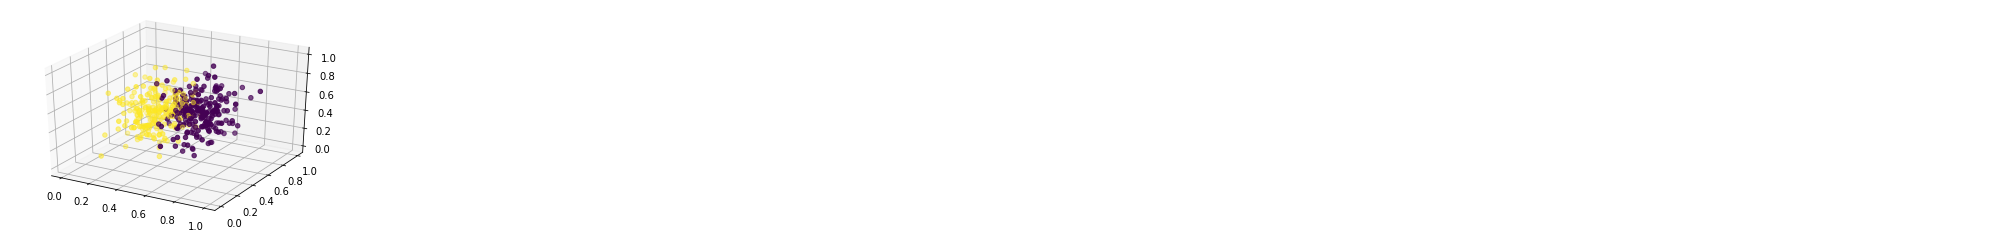

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z, c = data[1])

# Now Dimensionality Reduction using the Tensorflow

In [26]:
from tensorflow.contrib.layers import fully_connected

In [28]:
num_inputs=3
num_hidden=2
num_outputs=num_inputs

In [29]:
x = tf.placeholder(tf.float32,shape = (None,num_inputs))

In [30]:
hidden = fully_connected(x,num_hidden,activation_fn=None)

In [32]:
outputs = fully_connected(hidden,num_outputs,activation_fn=None)

In [33]:
# Loss function
loss = tf.reduce_mean(tf.square(outputs-x))

In [34]:
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

train = optimizer.minimize(loss)

In [35]:
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    sess.run(init)
    num_steps = 1000000
    
    for _ in range(num_steps):
        sess.run(train, feed_dict = {x:scaled_data})
    
    output_2d = hidden.eval(feed_dict={x:scaled_data})

In [40]:
output_2d

array([[ 1.17124736e+00,  3.05863529e-01],
       [ 1.06488347e+00,  1.17993146e-01],
       [ 6.81949615e-01, -2.28707641e-01],
       [ 6.34815812e-01, -3.06320399e-01],
       [ 9.77490604e-01,  6.70789182e-03],
       [ 8.80737185e-01,  1.35856330e-01],
       [ 2.81206250e-01, -7.90469944e-02],
       [ 5.16900599e-01,  2.85956264e-03],
       [ 1.02473116e+00,  6.05475903e-03],
       [ 6.63315892e-01, -1.70052558e-01],
       [ 3.18762392e-01, -3.37163240e-01],
       [ 1.26546538e+00,  3.63261402e-01],
       [ 8.28929007e-01,  4.73523736e-02],
       [ 1.23029602e+00,  2.17174336e-01],
       [ 1.98004067e-01, -1.55156851e-02],
       [ 1.12483215e+00,  2.23248303e-02],
       [ 7.30012596e-01,  3.17576200e-01],
       [ 8.77041996e-01, -1.55648082e-01],
       [ 1.07344794e+00, -1.07712001e-01],
       [ 8.87396753e-01,  1.41184479e-01],
       [ 6.21934474e-01, -1.08662277e-01],
       [ 8.20990026e-01,  3.48991036e-01],
       [ 1.17712843e+00,  2.25544930e-01],
       [ 9.

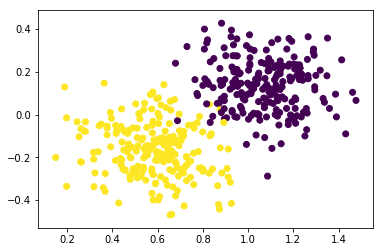

In [41]:
plt.scatter(output_2d[:,0], output_2d[:,1], c = data[1])